In [119]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [98]:
data=pd.read_csv("Housing.csv")

In [99]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [100]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [101]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [102]:
data.reset_index(drop=True,inplace=True)

In [103]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [105]:
mapping={"yes":1,"no":0}
cols =  ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in cols:
    data[col]=data[col].map(mapping)

In [106]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object

In [107]:
encoder=LabelEncoder()
data["furnishingstatus"]=encoder.fit_transform(data["furnishingstatus"])

In [108]:
data.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int32
dtype: object

In [109]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2bb5d332fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bb5d637f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bb5d332610>,
 'medians': [<matplotlib.lines.Line2D at 0x2bb5d5cb4c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2bb5d5cb760>,
 'means': []}

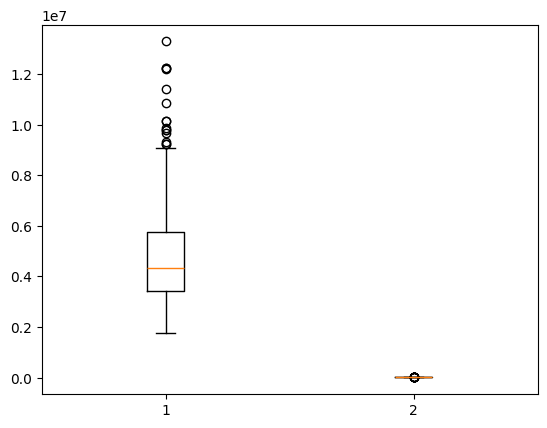

In [113]:
columns = ['price','area']
plt.boxplot(data[columns])

In [ ]:
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data[~((data[columns] < lower_bound) | (data[columns] > upper_bound)).any(axis=1)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2bb5d67dc40>,
 'caps': [<matplotlib.lines.Line2D at 0x2bb5d68c1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bb5d67d9a0>,
 'medians': [<matplotlib.lines.Line2D at 0x2bb5d68c730>,
 'fliers': [<matplotlib.lines.Line2D at 0x2bb5d68c9d0>,
 'means': []}

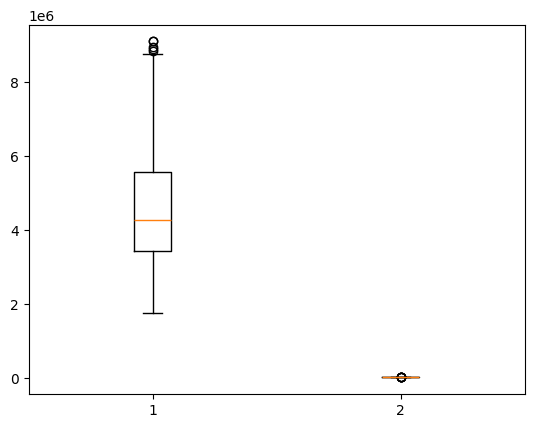

In [114]:
plt.boxplot(data_cleaned[columns])

In [ ]:
predictors = data.drop(['price'],axis=1)
target=data['price']
x_train,x_val,y_train,y_val=train_test_split(predictors,target,test_size=0.2,random_state=0)

In [115]:
predictors = data_cleaned.drop(['price'],axis=1)
target=data_cleaned['price']
x_train,x_val,y_train,y_val=train_test_split(predictors,target,test_size=0.2,random_state=0)

In [116]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled=scaler.transform(x_val)

In [117]:
#Linear Regression

lin_reg=LinearRegression()
lin_reg.fit(x_train_scaled,y_train)
y_pred=lin_reg.predict(x_val_scaled)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mse)
print(r2)

959635684181.9585
0.5899769851355167


In [120]:
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(x_train_scaled, y_train)
y_pred = dt_model.predict(x_val_scaled)

mse_dt = mean_squared_error(y_val, y_pred)
r2_dt = r2_score(y_val, y_pred)
print(mse)
print(r2)

959635684181.9585
0.5899769851355167
